# Exercise 11 - Object Recognition

### Program 1 - Implementation of Object Recognition in Cifar10 dataset using CNN


#### AIM:
To implement Object Recognition in Cidataset using CNN.

#### Modules used:

| Modules         | Version   |
| --------------  | --------- |
| tensorflow-gpu  |  2.6.0    |
| numpy           |  1.19.5   |
| pandas          |  1.3.0    |
| matplotlib      |  3.4.3    |


#### Neural Network Architecture:


|  Layer (type)    |   Output Shape     |
| ---------------- | ------------------ |      
| Conv2D           | (None, 32, 32, 25) |            
| Conv2D(1)        | (None, 32, 32, 50) |            
| MaxPooling2D     | (None, 16, 16, 50) |            
| Dropout          | (None, 16, 16, 50) |            
| Conv2D(2)        | (None, 16, 16, 70) |            
| MaxPooling2D(1)  | (None, 8, 8, 70)   |            
| Dropout(1)       | (None, 8, 8, 70)   |            
| Flatten          | (None, 4480)       |            
| Dense            | (None, 500)        |           
| Dropout(2)       | (None, 500)        |                
| Dense(1)         | (None, 250)        |            
| Dropout(3)       | (None, 250)        |        
| Dense(2)         | (None, 10)         |       

#### Part 1 - Importing the Modules  and Loading the dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, EarlyStopping
from tensorflow import random


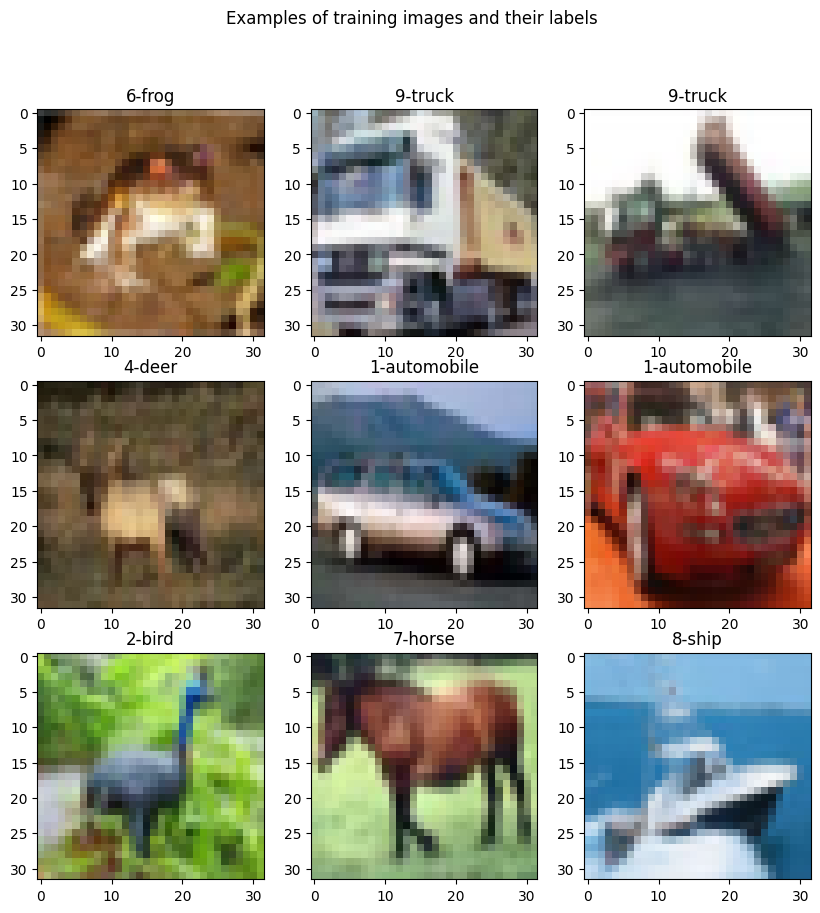

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
cifar_classes =np.array( ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog','horse', 'ship', 'truck'])
plt.figure(figsize=(10,10))
plt.suptitle('Examples of training images and their labels')
for i in range(9):
    plt.subplot(331 + i,title=f'{y_train[i,0]}-{cifar_classes[y_train[i,0]]}') 
    plt.imshow(X_train[i])
plt.show()

In [3]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
print(f"Shape of training data:\nX-train_shape={X_train.shape} , y-train_shape={y_train.shape}")
print(f"Shape of testing data:\nX-test_shape={X_test.shape} , y-test_shape={y_test.shape}")


Shape of training data:
X-train_shape=(50000, 32, 32, 3) , y-train_shape=(50000, 10)
Shape of testing data:
X-test_shape=(10000, 32, 32, 3) , y-test_shape=(10000, 10)


#### Part 2 - Creating the model
#### Building a linear stack of layers with the sequential model in tensorflow Keras

In [23]:
def get_model():
    model = Sequential()
    # convolutional layer
    model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))
    # convolutional layer
    model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(70, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    # flatten output of conv
    model.add(Flatten())
    # hidden layer
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(250, activation='relu'))
    model.add(Dropout(0.3))
    # output layer
    model.add(Dense(10, activation='softmax'))
    # Compiling the Model
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
    return model



In [24]:
random.set_seed(0)
model=get_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 25)        700       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 50)        11300     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 50)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 50)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 70)        31570     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 70)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 70)          0

#### Part 3 -  Training the Model

In [9]:
checkpoint= ModelCheckpoint("./model/cifar10_epo_cnn.h5",monitor='val_accuracy',mode='max', save_best_only=True)
early_stop = EarlyStopping(monitor="val_accuracy", patience=5, mode="max")
call_backs=[early_stop,checkpoint]
history = model.fit(X_train, y_train, batch_size=32, epochs=50, verbose=True,validation_split=0.2)

Epoch 1/50
1250/1250 [==============================] - 45s 14ms/step - loss: 1.5681 - accuracy: 0.4265 - val_loss: 1.1766 - val_accuracy: 0.5810
Epoch 2/50
1250/1250 [==============================] - 11s 9ms/step - loss: 1.1617 - accuracy: 0.5900 - val_loss: 0.9902 - val_accuracy: 0.6549
Epoch 3/50
1250/1250 [==============================] - 11s 9ms/step - loss: 1.0002 - accuracy: 0.6546 - val_loss: 0.9001 - val_accuracy: 0.6863
Epoch 4/50
1250/1250 [==============================] - 11s 9ms/step - loss: 0.9001 - accuracy: 0.6850 - val_loss: 0.7941 - val_accuracy: 0.7307
Epoch 5/50
1250/1250 [==============================] - 11s 9ms/step - loss: 0.8284 - accuracy: 0.7090 - val_loss: 0.7872 - val_accuracy: 0.7284
Epoch 6/50
1250/1250 [==============================] - 11s 9ms/step - loss: 0.7686 - accuracy: 0.7312 - val_loss: 0.7497 - val_accuracy: 0.7411
Epoch 7/50
1250/1250 [==============================] - 11s 9ms/step - loss: 0.7166 - accuracy: 0.7485 - val_loss: 0.7364 - val_a

#### Part 4 - Plotting Accuracy and Loss curves

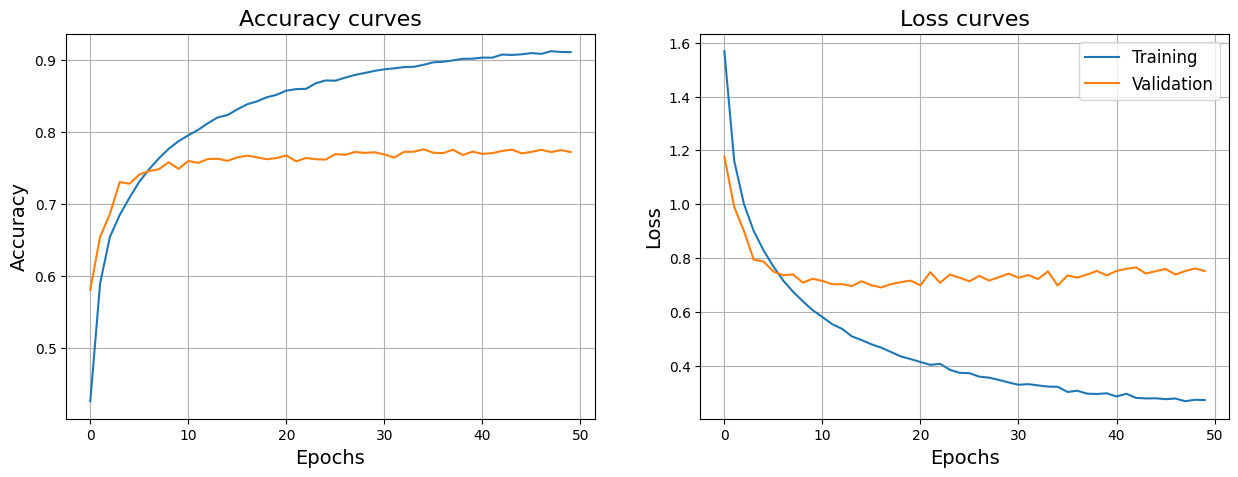

In [10]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
# plotting Accuracy curves
ax[0].plot(history.history['accuracy'],'C0')
ax[0].plot(history.history['val_accuracy'],'C1')
ax[0].set_title(label="Accuracy curves",fontsize=16)
ax[0].set_xlabel('Epochs',fontsize=14)
ax[0].set_ylabel('Accuracy',fontsize=14)
ax[0].grid()
# plotting Loss curves
ax[1].plot(history.history['loss'],'C0')
ax[1].plot(history.history['val_loss'],'C1')
ax[1].set_title(label="Loss curves",fontsize=16)
ax[1].set_xlabel('Epochs',fontsize=14)
ax[1].set_ylabel('Loss',fontsize=14)
ax[1].grid()
plt.legend(['Training','Validation'],fontsize=12)
plt.show()


#### Part 5 - Store Trained Model for Testing and Future use

In [11]:
model.save("./model/cifar10_epo_cnn.h5")
model.save_weights("./model/cifar10_epo_cnn_weights.h5")
print("Model Weights Saved...!")

Model Weights Saved...!


#### Part 6 - Testing

In [12]:
# Load the Trained Model
import pandas as pd
from keras.models import  load_model
model = load_model('./model/cifar10_epo_cnn.h5')
print("Model Loaded...!")

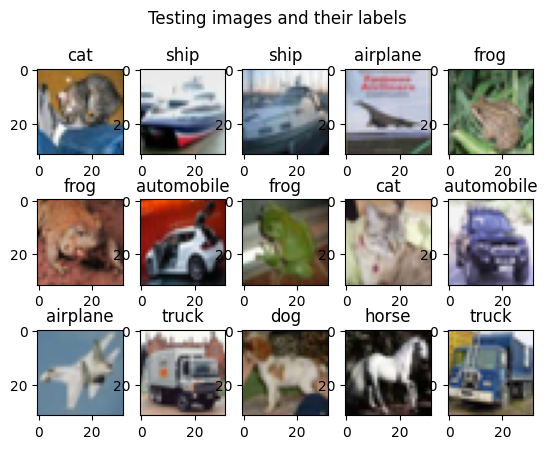

,class name,count
0,airplane,2
1,automobile,2
2,cat,2
3,dog,1
4,frog,3
5,horse,1
6,ship,2
7,truck,2


In [15]:
m=15
y_pred_=model.predict(X_test[:m])
y_pred_class=y_pred_.argmax(-1)
unique,counts=np.unique(result_,return_counts=True)
plt.suptitle('Testing images and their labels')
for i in range(15):
    plt.subplot(3,5,i+1,title=f'{cifar_classes[y_pred_class[i]]}') 
    plt.imshow(X_test[i])
plt.show()
freq=list(zip(cifar_classes[unique],counts))
pd.DataFrame(freq,columns=["class name","count"])